In [37]:
import networkx as nx
import osmnx as ox
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt

ox.config(log_console=True, use_cache=True)


In [38]:
place = 'Piedmont, California, USA'
G = ox.graph_from_place(place, network_type='drive_service')
G = ox.project_graph(G)

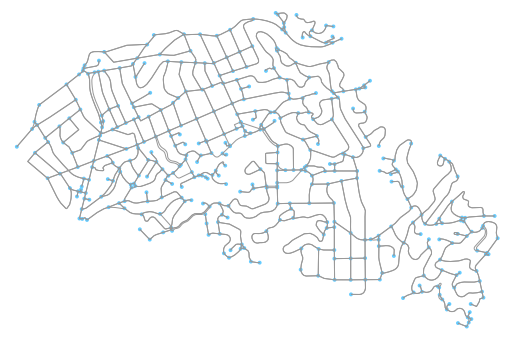

In [39]:
fig, ax = ox.plot_graph(G)

In [45]:
source_node = G[53124805]
destination_node = G[5477879797]



class Node:
    def __init__(self, node, osmid, distance = 0, parent = None):
        self.node = node
        self.distance = distance
        self.parent = parent
        self.osmid = osmid
    
    def expand(self):
        children = []
        for child in self.node:
            children.append(Node(G[child], child, distance = self.node[child][0]['length'], parent = self))
        return children
    
    def path(self):
        node = self
        path = []
        while node:
            path.append(node.osmid)
            node = node.parent
        return path[::-1]
    
    def __eq__(self, other):
        return self.osmid == other.osmid
    
    def __hash__(self):
        return hash(self.osmid)
    
    
origin = Node(source_node, 53124805, distance = 0, parent = None)

children = origin.expand()


nextgeneration = children[0].expand()

for ID in nextgeneration[0].path():
    print(ID)



53124805
53124807
53092201


In [46]:
node_Xs = [float(x) for _, x in G.nodes(data='x')]
node_Ys = [float(y) for _, y in G.nodes(data='y')]
edges = ox.graph_to_gdfs(G, nodes=False, fill_edge_geometry=True)
west, south, east, north = edges.total_bounds

In [52]:
ll = [53124805, 53125997, 53046251, 53046250, 53027463, 53152062, 53085382, 53023513, 53122757, 317339074, 53036558, 53095909, 53073843, 53152083, 53152069, 53152068, 5477879803, 5477879802, 53117166, 4918961128, 53062958, 4918961130, 5477879796, 5477879797]

In [53]:
nc = ['r' if node in ll else '#336699' for node in G.nodes()]
ns = [50 if node in ll or node == 53124803 or node == 2518218246 or node == 53125997 else 8 for node in G.nodes()]

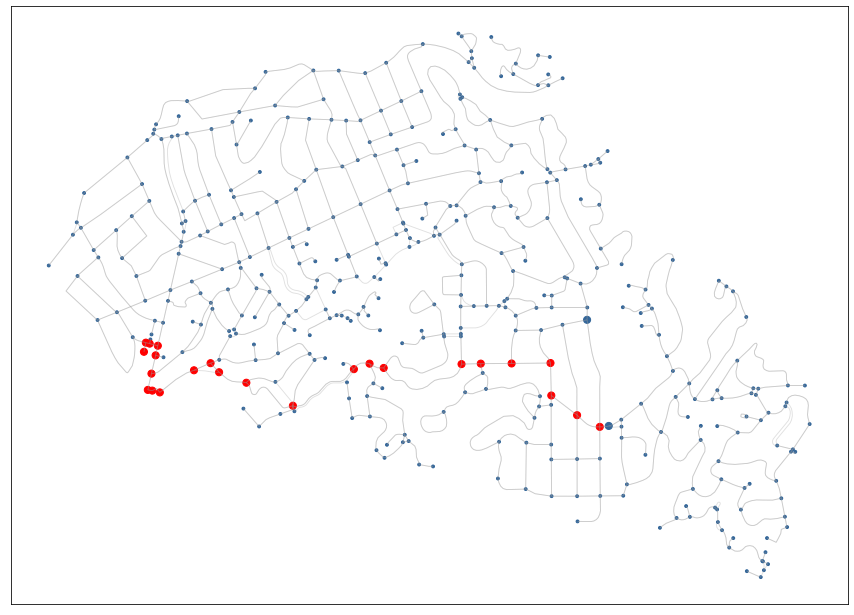

In [54]:
fig, ax = plt.subplots(figsize=(15,11))
ax.set_facecolor('w')

lines = []
for u, v, data in G.edges(keys=False, data=True):
        if 'geometry' in data:
            xs, ys = data['geometry'].xy
            lines.append(list(zip(xs, ys)))
        else:
            x1 = G.nodes[u]['x']
            y1 = G.nodes[u]['y']
            x2 = G.nodes[v]['x']
            y2 = G.nodes[v]['y']
            line = [(x1, y1), (x2, y2)]
            lines.append(line)
            
lc = LineCollection(lines, colors='#999999', linewidths=0.9, alpha=0.3)
ax.add_collection(lc)

y = ax.scatter(node_Xs, node_Ys, s=ns, c=nc)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()


In [50]:
from math import inf
from collections import deque
import sys
origin = Node(source_node, 53124805, distance = 0, parent = None)
destination = Node(destination_node, 5477879797)

In [51]:
frontier = deque([origin])
explored = set()
found = False
while frontier and not found:
    node = frontier.popleft()
    explored.add(node)
    if node == destination:
        print("YESSSSSSS")
        print(node.path())
        found = True
        continue
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                print("YESSSS")
                print(child.path())
                found = True
                continue
            frontier.append(child)
    print(node.osmid)


53124805
53124807
53124803
2518218246
53125997
53092201
53133008
53074376
53127240
53125999
305541919
53046251
53092203
53092199
246744892
53046254
53074377
53118376
53046249
53126000
702970702
53046252
53046250
53046255
53092214
53046253
53074380
53156140
53118374
53112476
53027461
53088880
53092218
702970720
53101282
53027463
53092207
53050874
53027459
53134227
53156142
53108990
53112473
53118380
53079888
53092220
53080198
53075311
53101285
53142908
53152062
53092210
53050875
2391023394
2391023402
53118372
53108992
53112467
53148306
53126350
683050115
4606504193
7424080867
53064305
53064302
256340150
256339663
53044661
53156410
53085382
53156408
53027457
53073822
53126347
245118288
245118772
53037306
53059175
245370192
7424080861
7424080875
53064300
245384115
53092226
53044664
53059885
53156415
683050221
53023513
53027455
53044575
53097585
53097586
245118387
53037307
53093372
53088882
4612591433
7424080866
53116662
53116661
53092228
53144226
53118296
256338428
53149671
53156417
53021

In [97]:
omar = set()